# The Sparks Foundation -GRIP (May 2021)

Task 1:Prediction using Supervised Machine Learning

By: Janhavi Sanap

In [1]:
#import the libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load the dataset 

url = ("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data = pd.read_csv(url)
print("The data is successfully loaded.")
data

The data is successfully loaded.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# For statistical function.

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Vizualizing the data

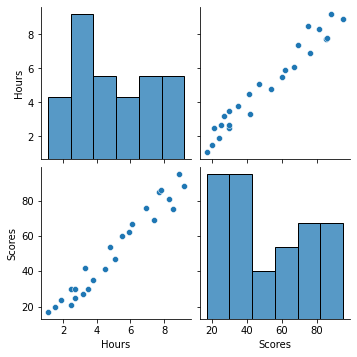

In [7]:
sb.pairplot(data)
plt.show()

In [8]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

# Preparing Data and splitting into train and test datasets.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [10]:
# We have Splitted Our Data Using 80:20 Rule

print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


In [11]:
from sklearn.linear_model import LinearRegression
linr=LinearRegression()
linr.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [12]:
# β0 is Intercept & Slope of the line is β1

print("B0 =",linr.intercept_,"\nB1 =",linr.coef_)

B0 = 2.018160041434669 
B1 = [9.91065648]


In [13]:
# Plotting the REGRESSION LINE

Y0 = linr.intercept_ + linr.coef_*X_train

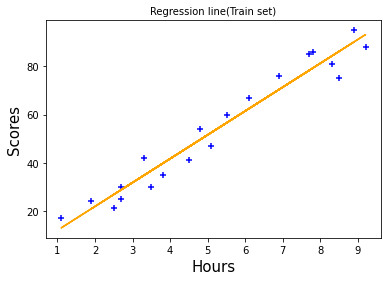

In [14]:
# Plotting on training data

plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,Y0,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [15]:
# To predict the scores of testing data 

Y_pred=linr.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [16]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

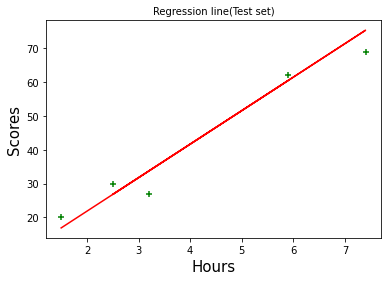

In [17]:
# Plotting the Regression line on testing data

plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='green',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()


In [18]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
dt_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
dt_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9454906892105355

# Above 94% indicates that above fitted Model is a GOOD MODEL.

Now, Predicting the Error:

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
# To find the mean squared error, root mean squared error

mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ", mse)
print("Root Mean Squared Error = ",rmse)

Mean Squared Error      =  21.598769307217413
Root Mean Squared Error =  4.647447612100368


# Predicting the Scores for 9.25 hrs:

In [25]:
Prediction_score = linr.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [93.69173249]


# CONCLUSION:

# From the above result we can say that if a student  studied for 9.25 hrs then the student will scored 93.69%

# Successfully completed the task.